In [1]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt

In [2]:
conn = psycopg2.connect("host='192.168.178.78'  dbname='prothesen'  user='postgres' password='postgres' ")

In [3]:
cur = conn.cursor()

In [4]:
cur.execute("select * from prothesen where opdatum >='2022-01-01' and opdatum < '2022-12-31';")

In [5]:
read = cur.fetchall()

In [6]:
cnames = ["id",
          "patientennummer",
          "prothesenart",
          "prothesentyp",
          "proximal",
          "distal",
          "seite",
          "wechseleingriff",
          "praeop_roentgen",
          "postop_roentgen",
          "fraktur",
          "planung",
          "opdatum",
          "operateur",
          "assistenz",
          "op_zeiten",
          "infektion",
          "luxation",
          "inklinationswinkel",
          "trochanterabriss",
          "fissuren",
          "thrombose_embolie",
          "sterblichkeit",
          "neurologie",
          "dokumentation",
          "memo",
          "knochenverankert",
          "periprothetisch",
          "reintervention",
          "abweichung",
          "ct",
          "ab_imp_art",
          "ab_imp_groesse",
          "ab_stab",
          "ab_blutung",
          "ab_praeop",
          "ab_operation",
          "ab_anaesthesie",
          "spaet_infekt",
          "einweiser",
          "neunzig_tage",
          "kniewinkel_prae",
          "kniewinkel_post",
          "vierundzwanzig_plus",
          "oak"]

In [7]:
df = pd.DataFrame(read, columns=cnames)

In [8]:
prothesenart = df.groupby('prothesenart')

In [9]:
prothesenart['id'].count()

prothesenart
Hüfte       313
Knie        183
Schulter     22
Name: id, dtype: int64

In [10]:
knie_rev = df[(df['prothesenart'] == 'Knie') & (df['wechseleingriff'] == True)]

In [11]:
knie_rev['id'].count()

16

In [12]:
knie_rev.groupby('infektion').size()

infektion
False    16
dtype: int64

In [13]:
knie_rev.groupby((knie_rev['kniewinkel_post'] > 3) | (knie_rev['kniewinkel_post'] < -3)).size()

kniewinkel_post
False    14
True      2
dtype: int64

In [14]:
knie_rev.groupby('fissuren').size()

fissuren
False    16
dtype: int64

In [15]:
def runden(zahl):
    return round(zahl / 5) * 5


opz = knie_rev.groupby(runden(knie_rev['op_zeiten'])).size()

In [16]:
knie_rev.groupby(knie_rev['op_zeiten'] > 120).size()

op_zeiten
False    14
True      2
dtype: int64

op_zeiten
65.0     2
70.0     1
75.0     1
80.0     1
85.0     1
90.0     2
95.0     1
105.0    3
120.0    2
135.0    1
155.0    1
dtype: int64

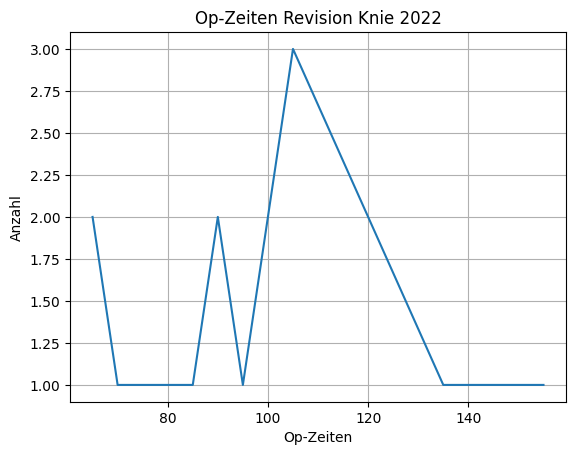

In [17]:
plot2 = opz.plot(kind='line', xlabel='Op-Zeiten', ylabel='Anzahl', grid=True,
                 title='Op-Zeiten Revision Knie 2022')
# plot2.bar_label(plot2.containers[0])
opz

In [18]:
knie_rev.groupby('thrombose_embolie').size()

thrombose_embolie
False    16
dtype: int64

In [19]:
knie_rev.groupby('sterblichkeit').size()

sterblichkeit
False    16
dtype: int64